# Myo modes comparison.

The Myo has 3 different modes of EEG sending EEG data:
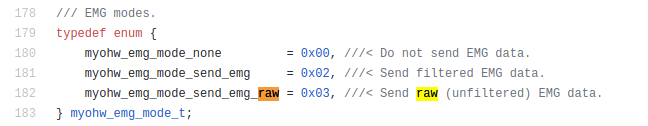

I have recorded 20 seconds of hand waving to see the difference between these modes.

Modes 1 and 2 were recorded shortly after one another, where as mode 3 was discovered later. 
To keep the positioning similar for all 3 recordings, the position of the main sensor pad with the LED pad was drawn with pen on my hand and subsequent recordings were aligned to this positioning. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
cols = ['One', 'Two', 'Three', "Four", "Five", "Six", "Seven", "Eight", "Rect", "Time_ns"]

df_f = pd.read_csv("20_0x01_filtered.csv")
df_f.columns = cols
df_f['Rect'] = df_f['Rect'] / max(df_f['Rect'])

df_n = pd.read_csv("20_0x02_raw_filtered.csv")
df_n.columns = cols
df_n['Rect'] = df_n['Rect'] / max(df_n['Rect'])


df_nr = pd.read_csv("20_0x03_raw.csv")
df_nr.columns = cols
df_nr['Rect'] = df_n['Rect'] / max(df_n['Rect'])


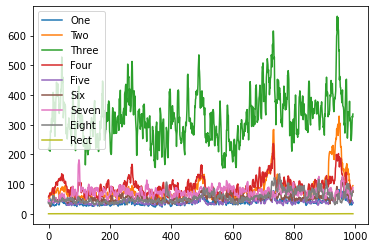

In [6]:
df_f.drop("Time_ns",1).plot()

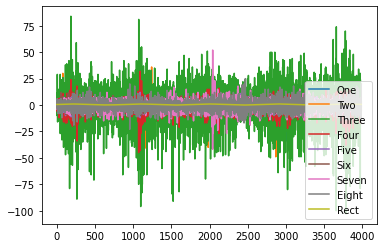

In [8]:
df_n.drop("Time_ns",1).plot()

We can see that the filtered data has been rectified and has a minimum of 20. 

In [9]:
df_f.describe()

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect,Time_ns
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,9.930000e+02
mean,39.912387,83.342397,329.055388,93.079557,41.908359,54.070493,72.927492,55.869084,0.527471,1.004111e+10
std,10.022021,43.812094,80.947775,28.403571,8.518283,11.329961,16.587949,18.851098,0.289818,5.751547e+09
min,23.000000,41.000000,154.000000,42.000000,27.000000,24.000000,36.000000,26.000000,0.000000,9.799299e+07
25%,33.000000,59.000000,274.000000,73.000000,36.000000,47.000000,63.000000,42.000000,0.278571,5.076981e+09
50%,38.000000,71.000000,323.000000,88.000000,41.000000,52.000000,73.000000,50.000000,0.550000,1.003697e+10
75%,45.000000,86.000000,376.000000,106.000000,46.000000,60.000000,82.000000,65.000000,0.778571,1.502442e+10
max,82.000000,329.000000,665.000000,237.000000,77.000000,124.000000,182.000000,135.000000,1.000000,1.998782e+10


In [10]:
df_n.describe()

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect,Time_ns
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3.989000e+03
mean,-0.748057,-0.937578,-0.871396,-0.771121,-0.823264,-0.805465,-0.754074,-0.764853,0.527681,9.994086e+09
std,2.713862,5.679095,18.384974,5.046276,2.741377,3.305987,4.257854,4.185141,0.288952,5.774062e+09
min,-34.000000,-49.000000,-103.000000,-45.000000,-12.000000,-13.000000,-42.000000,-23.000000,0.000000,3.224328e+07
25%,-2.000000,-4.000000,-11.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.278571,5.010607e+09
50%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.550000,9.993528e+09
75%,1.000000,2.000000,11.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.778571,1.498718e+10
max,11.000000,36.000000,84.000000,32.000000,12.000000,12.000000,52.000000,25.000000,1.000000,1.997698e+10


Comparing the means for df_n and df_f shows us why we rectify the signal. The none rectified signal, df_n has a mean of near 0. 

When EMG is acquired from electrodes mounted directly on the skin, the signal is a composite of all the muscle fiber action potentials occurring in the muscles underlying the skin. These action potentials occur at random intervals. So at any one moment, the EMG signal may be either positive or negative voltage. [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1455479/)

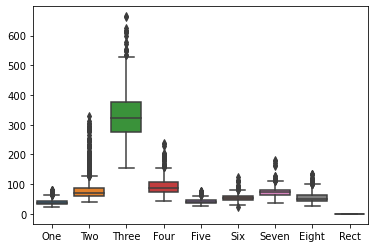

In [14]:
sns.boxplot(data=df_f.drop("Time_ns",1))

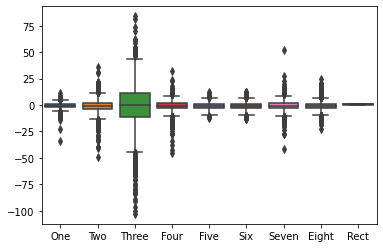

In [16]:
sns.boxplot(data=df_n.drop("Time_ns",1))

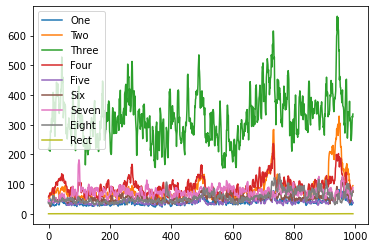

In [18]:
df_f.drop("Time_ns",1).plot()

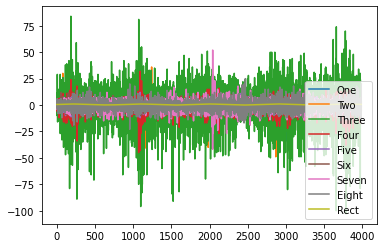

In [20]:
df_n.drop("Time_ns",1).plot()

## Filtered data analysis

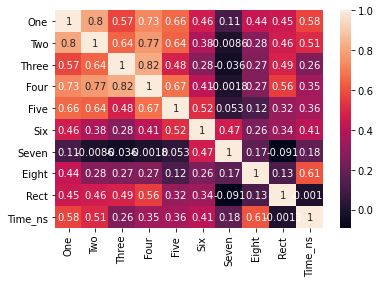

In [21]:
sns.heatmap(df_f.corr(), annot=True)

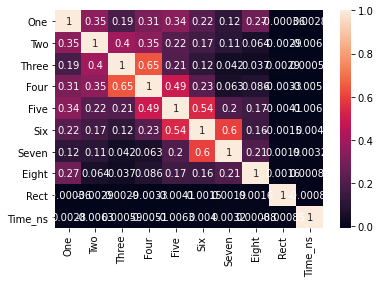

In [22]:
sns.heatmap(df_n.corr(), annot=True)

We can clearly see from the corrolations that filtering has helped generate meaningful corrolations between the position of the rectangle paddle, Rect and channel 3. We can also see corrolations between the channels. 

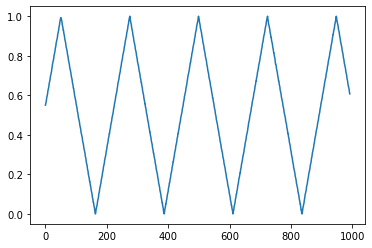

In [23]:
df_f['Rect'].plot()

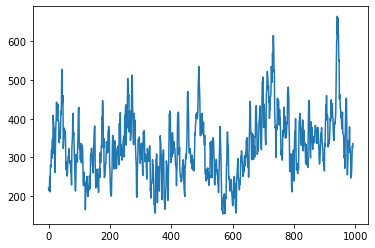

In [24]:
df_f['Three'].plot()

Looking at channel 3, we can see it rise as Rect does. 

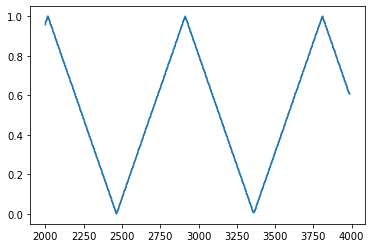

In [25]:
df_n['Rect'][2000:4000].plot()

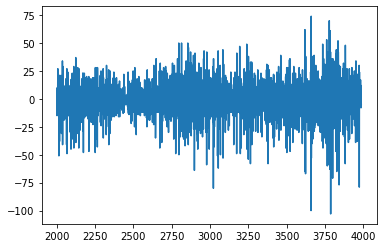

In [26]:
df_n['Three'][2000:4000].plot()

## Filtering the none filtered data. 

The filtered signal is a stream of low-pass filtered EMG signals from the eight
        sensor pods of the Myo armband.
        Instead of getting the raw EMG signals, we get rectified and smoothed
        signals, a measure of the amplitude of the EMG (which is useful to have
        a measure of muscle strength, but are not as useful as a truly raw signal).
        
### Rectification


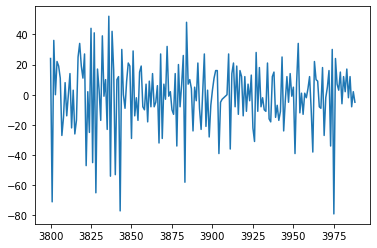

In [27]:
df_n['Three'][3800:4000].plot()

As shown above, the EMG signal is made up of both positive and negative components. 
This means the mean of our signal is close to 0. 

This can be a problem for analysis, we can see that our filtered data was a high mean. 

In [28]:
df_n.mean()

One       -7.480572e-01
Two       -9.375783e-01
Three     -8.713963e-01
Four      -7.711206e-01
Five      -8.232640e-01
Six       -8.054650e-01
Seven     -7.540737e-01
Eight     -7.648533e-01
Rect       5.276815e-01
Time_ns    9.994086e+09
dtype: float64

In [29]:
df_f.mean()

One        3.991239e+01
Two        8.334240e+01
Three      3.290554e+02
Four       9.307956e+01
Five       4.190836e+01
Six        5.407049e+01
Seven      7.292749e+01
Eight      5.586908e+01
Rect       5.274709e-01
Time_ns    1.004111e+10
dtype: float64

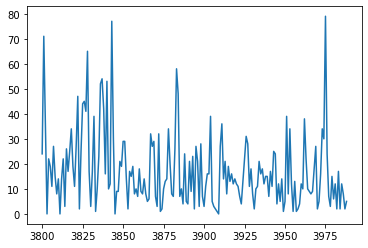

In [30]:
abs(df_n['Three'][3800:4000]).plot()

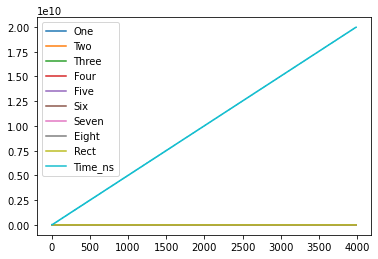

In [31]:
# Rectifying our non filtered data. 
df = abs(df_n)
df['Rect'] = df_n['Rect']
df.plot()

Text(0.5, 1.0, 'Corrolations of raw sEMG data.')

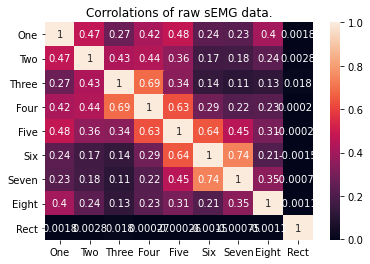

In [40]:
sns.heatmap(df_n.corr(), annot=True).set_title('Corrolations of raw sEMG data.')

Text(0.5, 1.0, 'Corrolations of rectified raw sEMG data.')

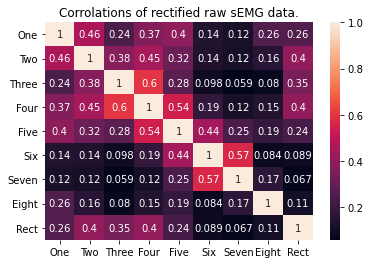

In [41]:
sns.heatmap(df.corr(), annot=True).set_title('Corrolations of rectified raw sEMG data.')

Text(0.5, 1.0, 'Corrolations of filtered sEMG data.')

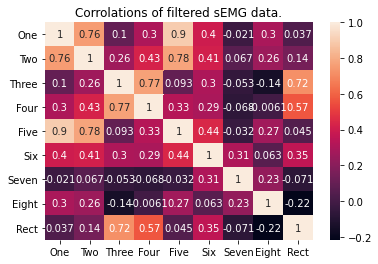

In [42]:
sns.heatmap(df_f.corr(), annot=True).set_title('Corrolations of filtered sEMG data.')

No handles with labels found to put in legend.


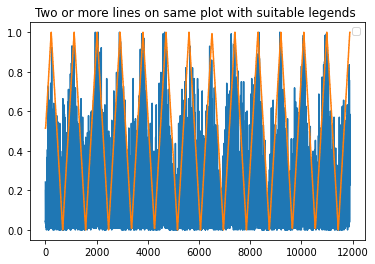

In [52]:
def plot_rect(df, channel="Three"):
    channel_data = df[channel] / max(df[channel])
    plt.plot(channel_data)
    plt.plot(df['Rect'])
    plt.title('Two or more lines on same plot with suitable legends ')
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.show()
plot_rect(df)

No handles with labels found to put in legend.


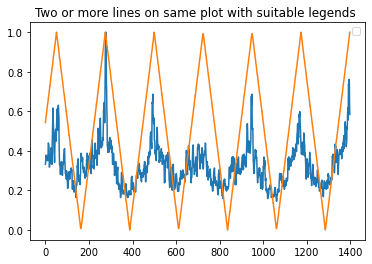

In [53]:
plot_rect(df_f)

We can see our signal is getting closer to being useful, but we can see our readings hit 0 frequently.

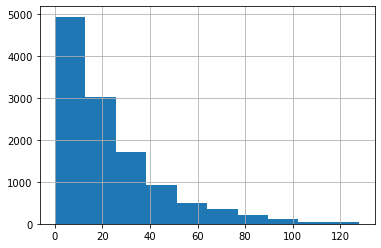

In [56]:
df['Three'].hist()

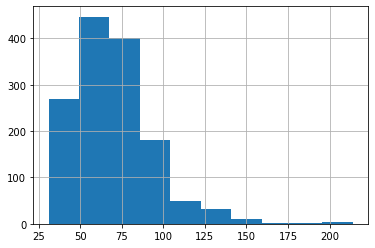

In [58]:
df_f['Three'].hist()

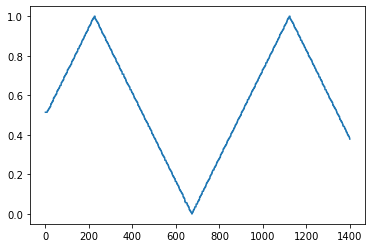

In [66]:
plt.plot(df['Rect'][0:1400])

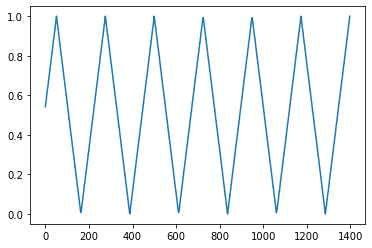

In [65]:
plt.plot(df_f['Rect'])

We can also see that for the same index range we have much less raw data than filtered data, but why is this?
To get around this, lets start logging time. 

In [68]:
df.head(10)

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect
0,4.0,5.0,31.0,8.0,4.0,3.0,1.0,3.0,0.514286
1,4.0,4.0,9.0,4.0,1.0,0.0,0.0,3.0,0.514286
2,0.0,9.0,5.0,2.0,1.0,1.0,0.0,0.0,0.514286
3,0.0,2.0,15.0,1.0,0.0,0.0,1.0,2.0,0.514286
4,3.0,6.0,9.0,2.0,0.0,0.0,2.0,0.0,0.514286
5,3.0,7.0,5.0,2.0,4.0,4.0,2.0,3.0,0.514286
6,0.0,1.0,6.0,7.0,3.0,4.0,2.0,1.0,0.514286
7,2.0,6.0,16.0,4.0,1.0,0.0,0.0,2.0,0.514286
8,1.0,6.0,4.0,1.0,3.0,4.0,0.0,1.0,0.514286
9,2.0,0.0,9.0,0.0,2.0,2.0,0.0,2.0,0.521429


In the above 9 rows from our non filtered data, we have multiple readings all for the same rect. 
Compared to below, where in the filtered data we see only one reading per rect value. 

In [69]:
df_f.head(10)

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect
0,92.0,69.0,71.0,56.0,175.0,53.0,37.0,50.0,0.542857
1,103.0,78.0,73.0,60.0,199.0,58.0,38.0,55.0,0.557143
2,112.0,89.0,76.0,67.0,220.0,63.0,38.0,57.0,0.564286
3,117.0,99.0,81.0,69.0,238.0,69.0,35.0,53.0,0.571429
4,121.0,108.0,77.0,67.0,259.0,79.0,31.0,51.0,0.578571
5,117.0,112.0,76.0,65.0,259.0,78.0,29.0,48.0,0.592857
6,123.0,116.0,80.0,69.0,271.0,78.0,31.0,47.0,0.600000
7,126.0,116.0,80.0,67.0,275.0,78.0,31.0,45.0,0.607143
8,118.0,109.0,76.0,63.0,255.0,73.0,30.0,44.0,0.621429
9,106.0,93.0,75.0,59.0,218.0,61.0,34.0,42.0,0.628571


# Comparing 20 seconds of data. 

In [16]:
df_n = pd.read_csv("20_nonfiltered.csv")
df_n.columns = ['One', 'Two', 'Three', "Four", "Five", "Six", "Seven", "Eight", "Rect", "Time_ns"]

df_f = pd.read_csv("20_filtered.csv")
df_f.columns = ['One', 'Two', 'Three', "Four", "Five", "Six", "Seven", "Eight", "Rect", "Time_ns"]
#df.to_csv("testing_data.csv", index=False)

In [5]:
df_f.describe()

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect,Time_ns
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,9.930000e+02
mean,39.912387,83.342397,329.055388,93.079557,41.908359,54.070493,72.927492,55.869084,738.459215,1.004111e+10
std,10.022021,43.812094,80.947775,28.403571,8.518283,11.329961,16.587949,18.851098,405.744714,5.751547e+09
min,23.000000,41.000000,154.000000,42.000000,27.000000,24.000000,36.000000,26.000000,0.000000,9.799299e+07
25%,33.000000,59.000000,274.000000,73.000000,36.000000,47.000000,63.000000,42.000000,390.000000,5.076981e+09
50%,38.000000,71.000000,323.000000,88.000000,41.000000,52.000000,73.000000,50.000000,770.000000,1.003697e+10
75%,45.000000,86.000000,376.000000,106.000000,46.000000,60.000000,82.000000,65.000000,1090.000000,1.502442e+10
max,82.000000,329.000000,665.000000,237.000000,77.000000,124.000000,182.000000,135.000000,1400.000000,1.998782e+10


In [6]:
df_n.describe()

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect,Time_ns
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3.989000e+03
mean,-0.748057,-0.937578,-0.871396,-0.771121,-0.823264,-0.805465,-0.754074,-0.764853,738.754074,9.994086e+09
std,2.713862,5.679095,18.384974,5.046276,2.741377,3.305987,4.257854,4.185141,404.532962,5.774062e+09
min,-34.000000,-49.000000,-103.000000,-45.000000,-12.000000,-13.000000,-42.000000,-23.000000,0.000000,3.224328e+07
25%,-2.000000,-4.000000,-11.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,390.000000,5.010607e+09
50%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,770.000000,9.993528e+09
75%,1.000000,2.000000,11.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1090.000000,1.498718e+10
max,11.000000,36.000000,84.000000,32.000000,12.000000,12.000000,52.000000,25.000000,1400.000000,1.997698e+10


## The data rate.
Filtered data: 993.000000  20.004196166992188 seconds.  
Non Filtered data: 3989.000000 20.008700609207153 seconds.  

Therefore the filtered data was sent at about 50Hz, and the raw data was sent at about 200Hz. 

In [45]:
len(df_f) / 20

49.65

In [46]:
len(df_n) / 20

199.45

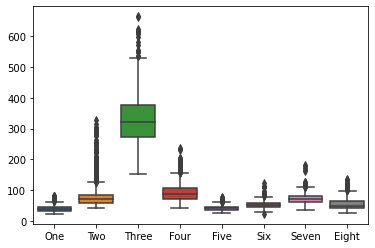

In [17]:
sns.boxplot(data=df_f.drop(['Time_ns','Rect'], 1))

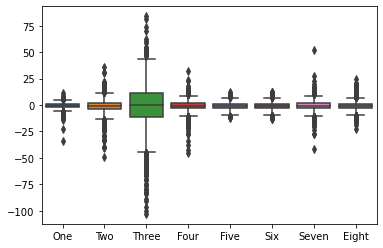

In [18]:
sns.boxplot(data=df_n.drop(['Time_ns','Rect'], 1))

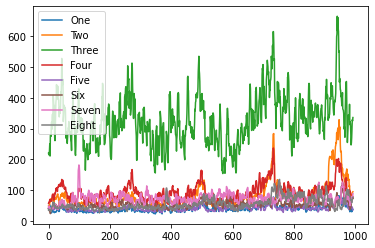

In [22]:
df_f.drop(['Time_ns','Rect'], 1).plot()

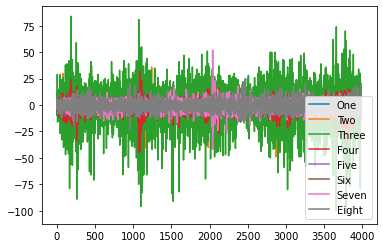

In [21]:
df_n.drop(['Time_ns','Rect'], 1).plot()

# Investigating the data rate. 

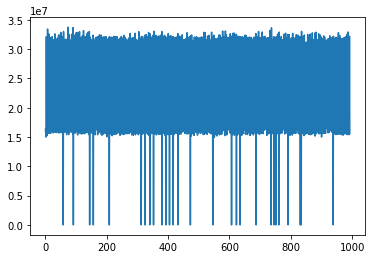

In [27]:
rate_f = df_f['Time_ns'].diff()
rate_f.plot()

In [43]:
1/ rate_f.mean()

4.987475161271374e-08

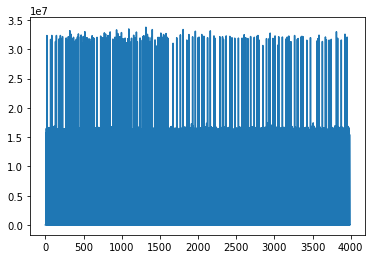

In [29]:
rate_n = df_n['Time_ns'].diff()
rate_n.plot()

# Non Filtered raw mode

3993 samples collected in 20.016239881515503 ~ 196.5Hz.

In [50]:
df_nr.describe()

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect,Time_ns
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3989.000000,3.993000e+03
mean,-0.781117,-1.087153,-0.602304,-0.836965,-0.730278,-0.790383,-0.797395,-0.882294,0.527681,1.000517e+10
std,3.913349,9.263263,34.128179,11.329007,5.012272,4.191184,5.214706,7.485167,0.288952,5.779633e+09
min,-28.000000,-87.000000,-128.000000,-123.000000,-38.000000,-24.000000,-29.000000,-50.000000,0.000000,1.652921e+07
25%,-3.000000,-6.000000,-13.000000,-5.000000,-4.000000,-3.000000,-4.000000,-4.000000,0.278571,5.005853e+09
50%,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.550000,1.000624e+10
75%,1.000000,4.000000,15.000000,4.000000,2.000000,2.000000,2.000000,1.000000,0.778571,1.500597e+10
max,29.000000,65.000000,127.000000,74.000000,34.000000,22.000000,27.000000,57.000000,1.000000,1.999997e+10


Given the -128 to 127 range, we can defenitely see the 8 bit signed representation. 

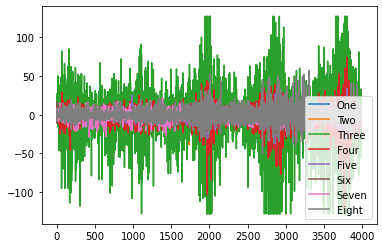

In [51]:
df_nr.drop(['Time_ns','Rect'], 1).plot()

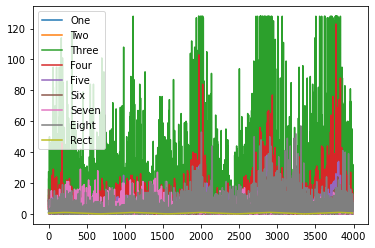

In [53]:
# Rectifying our non filtered data. 
df = abs(df_nr)
df['Rect'] = df_nr['Rect']
df.drop('Time_ns',1).plot()

Text(0.5, 1.0, 'Corrolations of non filtered sEMG data.')

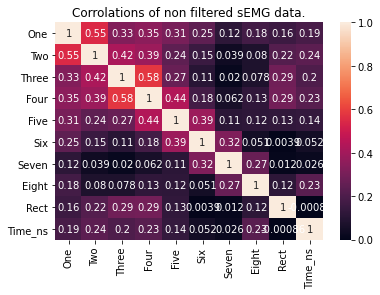

In [55]:
sns.heatmap(df.corr(), annot=True).set_title('Corrolations of non filtered sEMG data.')

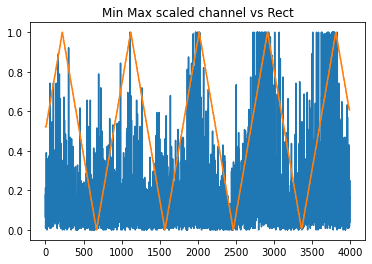

In [77]:
def plot_rect(dff, channel="Three", rec=True):
    channel_data = dff[channel] / max(dff[channel])
    if (rec):
        channel_data = abs(channel_data)
    plt.plot(channel_data)
    plt.plot(dff['Rect'] / max(dff['Rect']))
    plt.title('Min Max scaled channel vs Rect')
    # Display a figure.
    plt.show()
plot_rect(abs(df_nr))

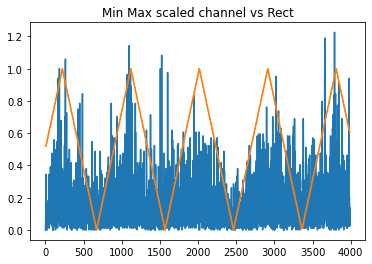

In [80]:
plot_rect(df_n)

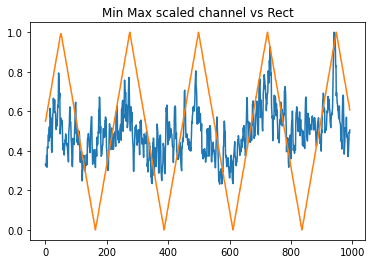

In [81]:
plot_rect(df_f)

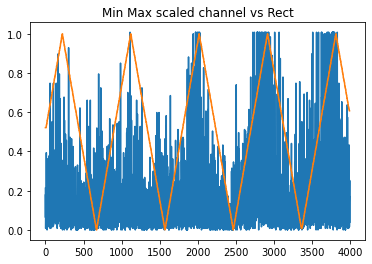

In [82]:
plot_rect(df_nr)

In [1]:
df['Three'].hist()

NameError: name 'df' is not defined